In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
df = pd.read_csv("merged_data_cleaned.csv")
df = df[df["Year"] == 2024]
df.dropna(subset=["Country Name"], inplace=True)

## Correlation matrix / Heatmap


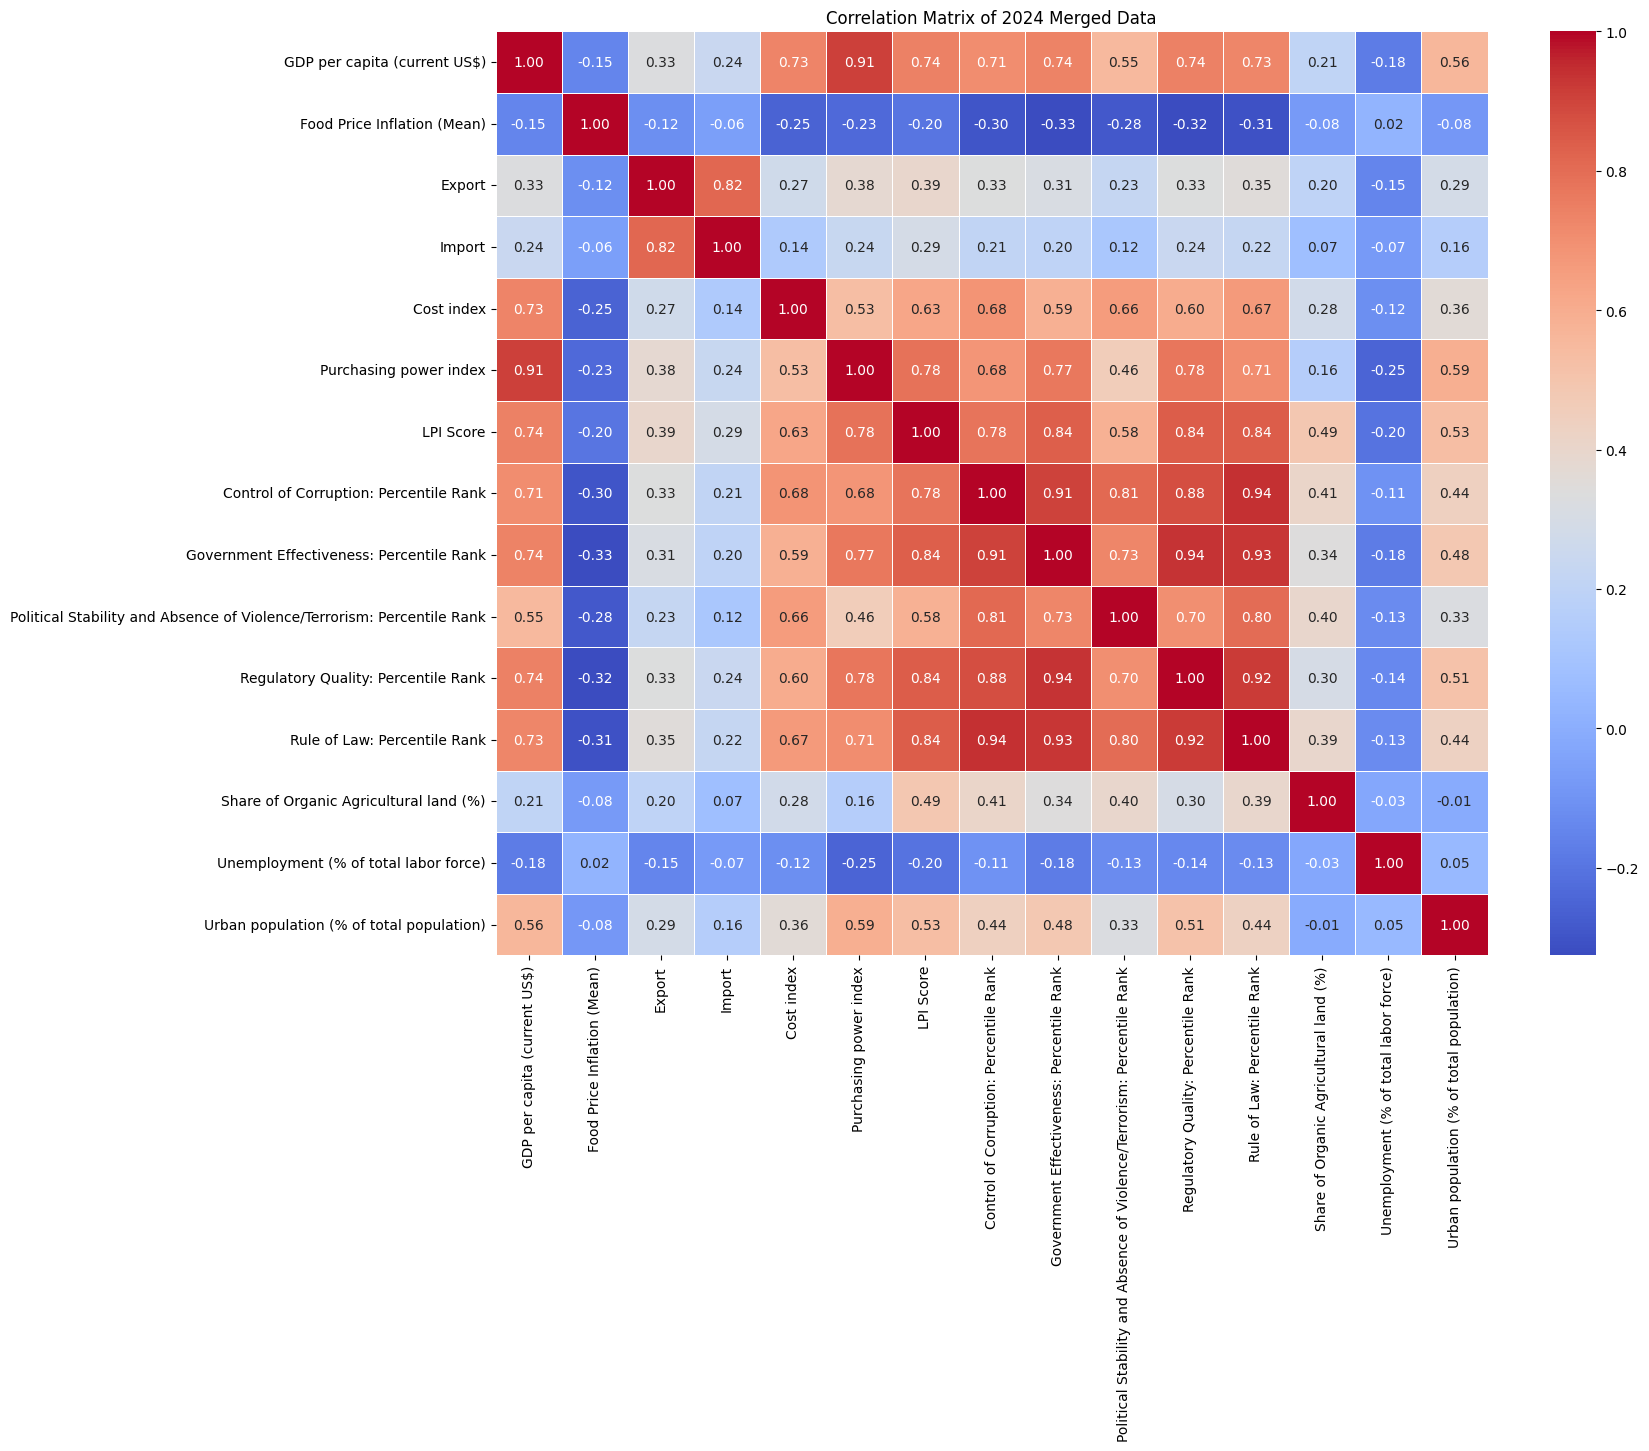

In [44]:
# Select numerical columns only
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.drop(columns=["Year"], inplace=True)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of 2024 Merged Data")
plt.show()

## Pairplots


### Prosperity & Governance


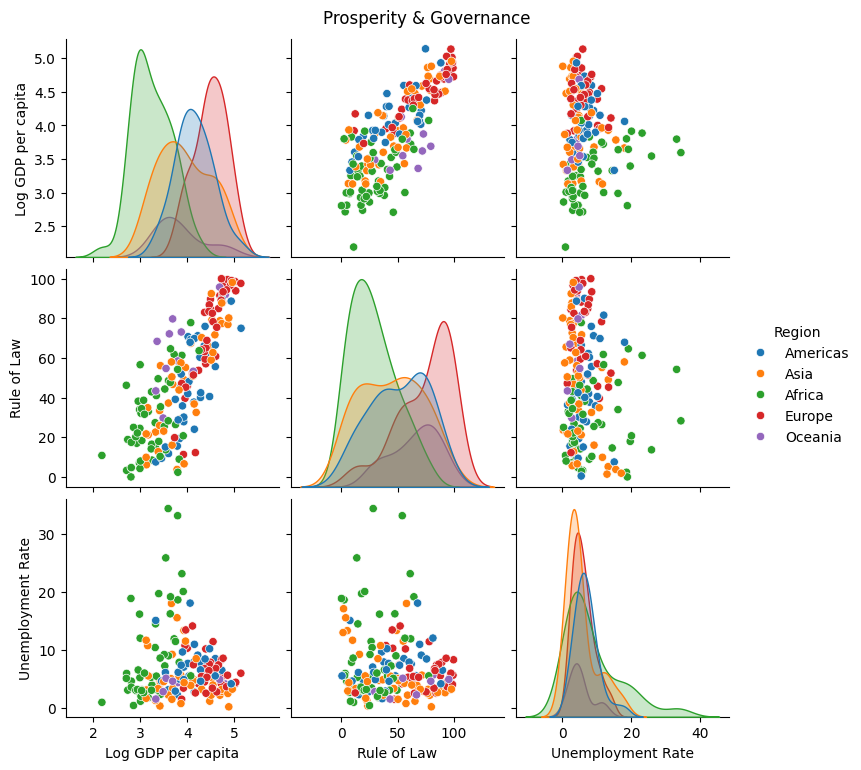

In [45]:
frame1 = df.copy()
frame1["Log GDP per capita"] = np.log10(frame1["GDP per capita (current US$)"])
cols_to_keep = [
    "Log GDP per capita",
    "Rule of Law: Percentile Rank",
    "Unemployment (% of total labor force)",
    "Region",
]
rename_map = {
    "Rule of Law: Percentile Rank": "Rule of Law",
    "Unemployment (% of total labor force)": "Unemployment Rate",
}
g = sns.pairplot(frame1[cols_to_keep].rename(columns=rename_map), hue="Region")
g.figure.suptitle("Prosperity & Governance", y=1.02)
plt.show()

### Global Connectivity


c:\Users\yoann\Documents\notebook test\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


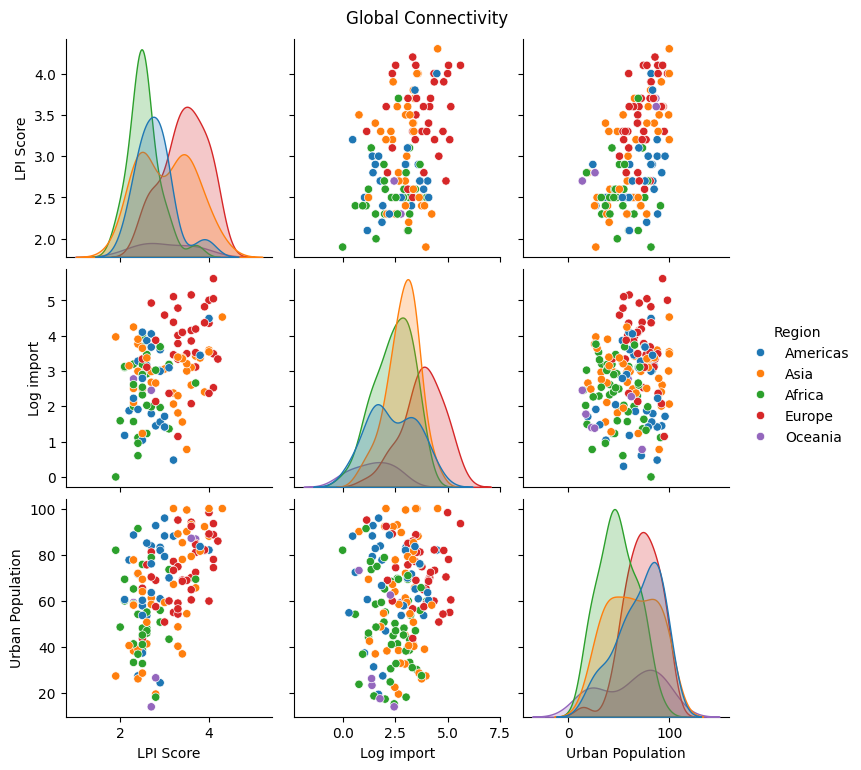

In [46]:
frame2 = df.copy()
frame2["Log import"] = np.log10(frame2["Import"])
cols_to_keep2 = [
    "LPI Score",
    "Log import",
    "Urban population (% of total population)",
    "Region",
]
rename_map = {
    "Urban population (% of total population)": "Urban Population",
}
g = sns.pairplot(frame2[cols_to_keep2].rename(columns=rename_map), hue="Region")
g.figure.suptitle("Global Connectivity", y=1.02)
plt.show()

### Resilience & Cost of Living


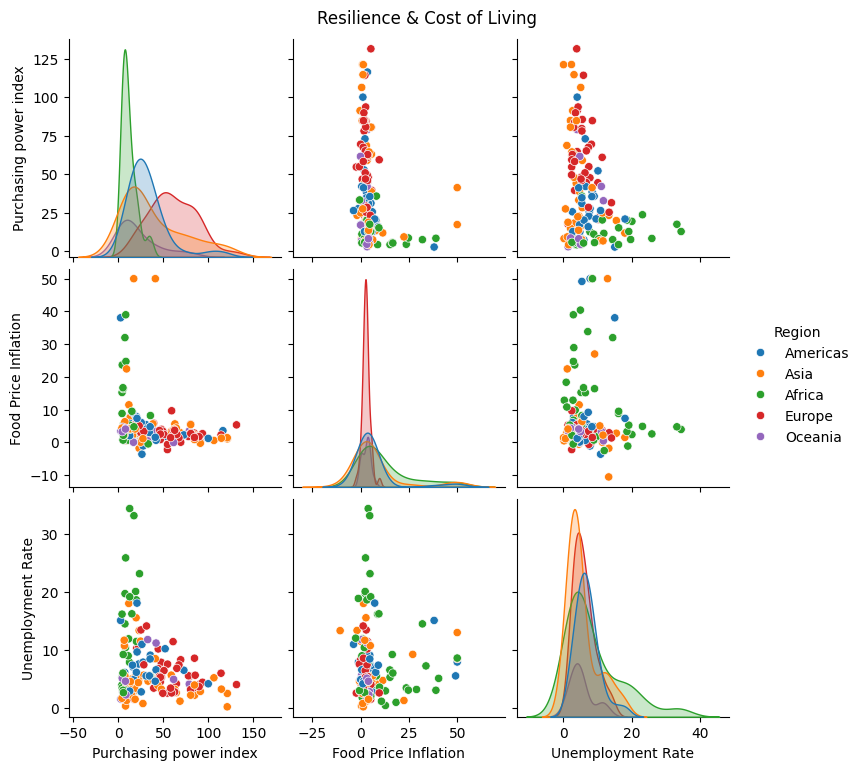

In [60]:
frame3 = df.copy()
cols_to_keep3 = [
    "Purchasing power index",
    "Food Price Inflation (Mean)",
    "Unemployment (% of total labor force)",
    "Region",
]
frame3["Food Price Inflation (Mean)"] = frame3["Food Price Inflation (Mean)"].clip(
    upper=50
)
rename_map = {
    "Food Price Inflation (Mean)": "Food Price Inflation",
    "Unemployment (% of total labor force)": "Unemployment Rate",
}
g = sns.pairplot(frame3[cols_to_keep3].rename(columns=rename_map), hue="Region")
g.figure.suptitle("Resilience & Cost of Living", y=1.02)
plt.show()